In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7.5
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcc2doeXNcTXkgRHJpdmUgKHNnaHlzZWxpQHN0dWRlbnQudWJjLmNhKVxxdWFydG9cZ2l0aHViaW9cY29udGVudFxlb3NjNTU1XGxlY3R1cmVzXGxlY3R1cmU2'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\sghys\AppData\Local\Temp\ipykernel_21944\952874052.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap_external.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\zipimport.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\codecs.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\aliases.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\__init__.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\utf_8.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\cp1252.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\io.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\stat.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\_collections_abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\

In [2]:
#| label: jvp
#| fig-cap: The Jacobian vector product using automatic differentiation.
#| code-fold: false

import torch
from torch.autograd.functional import jvp
from torch.autograd.functional import jacobian


# Define a simple forward function
def F(p):
    return torch.stack([p[0] ** 2 + p[1], p[1] ** 3 + p[0]])


# Input point p_k
p_k = torch.tensor([1.0, 1.0])

# Arbitrary vector v, same size as p_k
v = torch.tensor([1.0, 1.0], requires_grad=True)

# Compute the Jacobian-vector product (J(p) * v)
F_output, jvp_result = jvp(F, (p_k,), v, create_graph=True)
print("Function output:")
print(F_output)
print("Jacobian-vector product:")
print(jvp_result)

# Initialize a list to store each row of the Jacobian
jacobian_rows = []
# Compute the gradient of each component of the JVP result separately, retaining the graph to avoid re-computation
for i in range(F_output.shape[0]):
    v.grad = None  # Clear the gradient
    jvp_result.backward(
        torch.tensor([1.0 if i == j else 0.0 for j in range(F_output.shape[0])]),
        retain_graph=True,
    )
    jacobian_rows.append(v.grad.clone())  # Append the gradient (row of the Jacobian)

# Stack the rows to get the full Jacobian matrix
jacobian_matrix = torch.stack(jacobian_rows, dim=0)

# Print the Jacobian matrix
print("Jacobian matrix at p_k:")
print(jacobian_matrix)

# Compute the full Jacobian matrix directly
jacobian_matrix = jacobian(F, p_k)

# Print the Jacobian matrix
print("Jacobian matrix at p_k:")
print(jacobian_matrix)

Function output:
tensor([2., 2.], grad_fn=<StackBackward0>)
Jacobian-vector product:
tensor([3., 4.], grad_fn=<AddBackward0>)
Jacobian matrix at p_k:
tensor([[2., 1.],
        [1., 3.]])
Jacobian matrix at p_k:
tensor([[2., 1.],
        [1., 3.]])


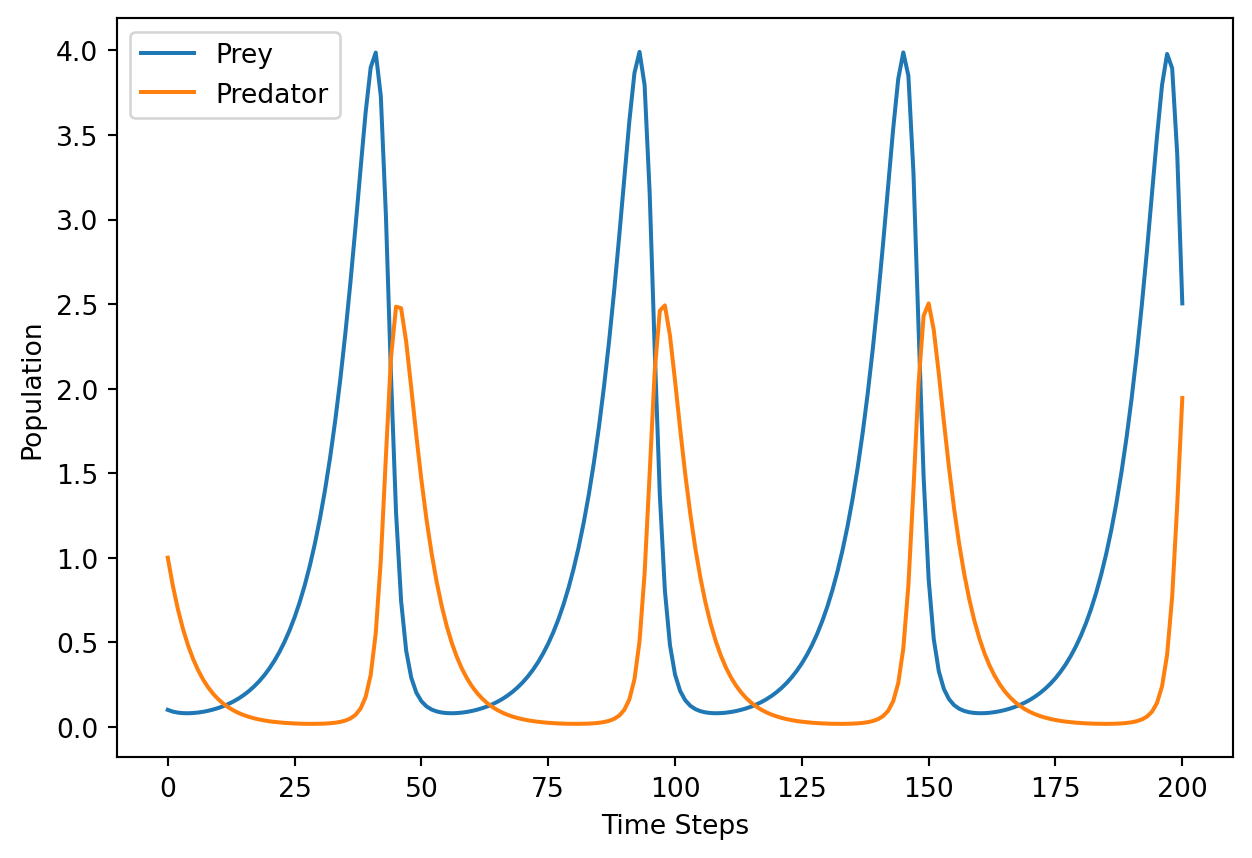

In [3]:
#| label: lotka-volterra
#| fig-cap: The Lotka-Volterra model implemented in PyTorch.

import torch
import matplotlib.pyplot as plt


def runge_kutta_4(func, x0, params, time_horizon, time_steps):
    dt = time_horizon / time_steps
    X = [x0]
    for i in range(time_steps):
        x = X[-1]
        k1 = func(x, params[i])
        k2 = func(x + dt * k1 / 2, params[i])
        k3 = func(x + dt * k2 / 2, params[i])
        k4 = func(x + dt * k3, params[i])
        X_next = x + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        X.append(X_next)
    return torch.stack(X, dim=1)


def lv_func(x, params):
    alpha, beta, gamma, delta = params
    dxdt = torch.zeros(2)
    dxdt[0] = alpha * x[0] - beta * x[0] * x[1]  # Prey population change
    dxdt[1] = -gamma * x[1] + delta * x[0] * x[1]  # Predator population change
    return dxdt


def lotka_volterra(params, x0, T=10, nt=1000):
    """
    Simulate the Lotka-Volterra model using the Runge-Kutta 4 method.

    Parameters:
    params (torch.Tensor): The parameters of the Lotka-Volterra model.
    x0 (torch.Tensor): The initial population of prey and predators.
    T (float): The time horizon of the simulation.
    nt (int): The number of time steps to simulate.

    Returns:
    torch.Tensor: The population of prey and predators at each time step.

    Notes:
    The parameters should be in the order alpha, beta, gamma, delta.
    They can either be fixed as [4,] or time-varying as [nt, 4].
    """

    # Check if params has shape [4,] and expand to [nt, 4] if needed
    if params.ndim == 1 and params.shape[0] == 4:
        # Repeat params along the time dimension to make it [nt, 4]
        params = params.unsqueeze(0).expand(nt, -1)
    elif params.shape != (nt, 4):
        raise ValueError("params must be either [4,] or [nt, 4]")

    # Proceed with the Runge-Kutta 4 integration
    return runge_kutta_4(lv_func, x0, params, T, nt)


period = 40.0  # Time horizon as a single float
n_time_steps = 200
params = torch.tensor([2 / 3, 4 / 3, 1.0, 1.0], requires_grad=True)
initial_pop = torch.tensor([0.1, 1.0])

solution = lotka_volterra(params, initial_pop, T=period, nt=n_time_steps)

# Plot the results
plt.plot(solution[0].detach(), label="Prey")
plt.plot(solution[1].detach(), label="Predator")
plt.xlabel("Time Steps")
plt.ylabel("Population")
plt.legend()
plt.show()

Computing realization 1/1


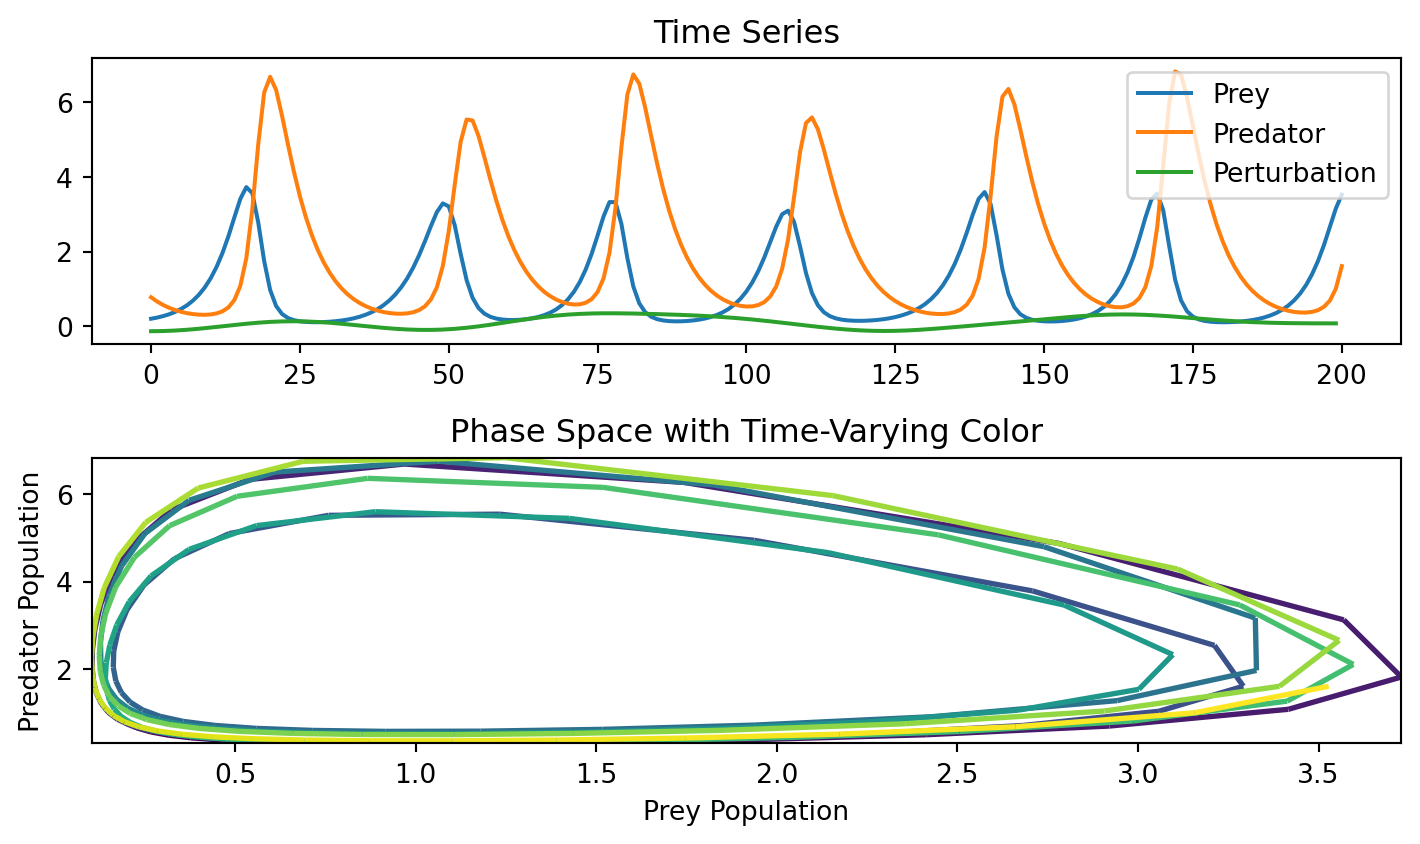

In [4]:
# | fig-cap: "Time variant Lotka-Volterra model with perturbations."

import numpy as np
from matplotlib.collections import LineCollection
from torch.nn.functional import pad


def generate_data_set(
    initial_pop=initial_pop, period=40.0, n_time_steps=2000, n_realizations=10
):
    pop_data_runs = []
    perturbations = []

    for run_idx in range(n_realizations):
        print(f"Computing realization {run_idx + 1}/{n_realizations}")

        # Generate noise for perturbing alpha across time steps
        noise = torch.randn(
            1, n_time_steps
        )  # Shape [1, n_time_steps] for a single parameter over time
        for _ in range(250):  # Smooth out the noise to resemble realistic fluctuations
            noise = pad(noise, pad=(1, 1), mode="reflect")
            noise = (noise[:, :-2] + 2 * noise[:, 1:-1] + noise[:, 2:]) / 4
        noise = noise.squeeze()  # Shape [n_time_steps]

        # Base parameters without perturbation, as shape [n_time_steps, 4]
        base_params = torch.tensor([4 / 3, 2 / 3, 1, 1]).expand(n_time_steps, 4)

        # Apply perturbation to alpha (the first parameter)
        params = base_params.clone()
        params[:, 0] += noise  # Modify alpha over time

        # Solve ODE with perturbed parameters
        pop_data = lotka_volterra(params, initial_pop, T=period, nt=n_time_steps)

        pop_data_runs.append(pop_data)
        perturbations.append(noise)

    return pop_data_runs, perturbations


initial_pop = torch.rand(2)
XX, M = generate_data_set(
    initial_pop=initial_pop, period=period, n_time_steps=n_time_steps, n_realizations=1
)

X = XX[0]
pert = M[0]
d_true = X[0, :]  # Use the prey population as the data to fit

# Time series plot
plt.figure(figsize=(7.5, 4.5))
plt.subplot(2, 1, 1)
plt.plot(X[0, :].detach(), label="Prey")
plt.plot(X[1, :].detach(), label="Predator")
plt.plot(pert.detach(), label="Perturbation")
plt.legend()
plt.title("Time Series")

# Phase space plot with color gradient
plt.subplot(2, 1, 2)

# Prepare data for LineCollection
prey = X[0, :].detach().numpy()
predator = X[1, :].detach().numpy()
points = np.array([prey, predator]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cmap = "viridis"

# Create a LineCollection with the chosen colormap
lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 1))
lc.set_array(np.linspace(0, 1, len(segments)))  # Normalize color range to [0,1]
lc.set_linewidth(2)

# Add the LineCollection to the plot
plt.gca().add_collection(lc)

# Set plot limits to the data range
plt.xlim(prey.min(), prey.max())
plt.ylim(predator.min(), predator.max())

plt.title("Phase Space with Time-Varying Color")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")

plt.tight_layout()
plt.show()

In [5]:
#| label: jacobian-vector-product
#| fig-cap: Checking the jvp and vjp for the model.

from torch.autograd.functional import jvp, vjp

# fix all parts of the problem except the parameters
def forward_model(params):
    X = lotka_volterra(params, initial_pop, T=period, nt=n_time_steps)
    prey = X[0, :]
    return prey

# set an initial guess for the parameters
params = torch.tensor([2 / 3, 4 / 3, 1.0, 1.0], requires_grad=True)
v = torch.randn_like(params)

d, q = jvp(forward_model, params, v)

w = torch.randn_like(d)
d, a = vjp(forward_model, params, w)

# Check adjoint consistency
print(torch.sum(q * w), torch.sum(a * v))

tensor(80.2678) tensor(80.2678)


In [6]:
#| label: conjugate-gradient
#| fig-cap: Conjugate gradient descent for solving the normal equations.
#| code-fold: false

from functools import partial

def Hmv(forProb, p, sk):
    q = torch.autograd.functional.jvp(forProb, p, sk)[1]
    a = torch.autograd.functional.vjp(forProb, p, q)[1]
    return a

def conj_gradient(A, b, x0=None, niter=20, tol=1e-2, alpha=1e-2, verbose=True):
    """
    Solve Ax = b using the conjugate gradient method.

    Paramters:
        A (callable): A function that computes the matrix-vector product Ax.
        b (torch.Tensor): The right-hand side vector.
        x0 (torch.Tensor, optional): The initial guess. Defaults to None.
        niter (int, optional): Maximum number of iterations. Defaults to 20.
        tol (float, optional): Tolerance for the residual. Defaults to 1e-2.
        alpha (float, optional): Step size for the conjugate gradient method. Defaults to 1e-2.
    """
    if x0 is None:
        r = b
    else:
        r = b - A(x0)

    q = r
    x = torch.zeros_like(b)
    for i in range(niter):
        Hq = A(q)
        alpha = (r * r).sum() / (q * Hq).sum()
        x = x + alpha * q
        rnew = r - alpha * Hq
        beta = (rnew**2).sum() / (r**2).sum()
        q = rnew + beta * q
        r = rnew.clone()
        if verbose:
            print("iter = %3d    res = %3.2e" % (i, r.norm() / b.norm()))
        if r.norm() / b.norm() < tol:
            break
    return x

A = partial(Hmv, forward_model, params)
b = torch.autograd.functional.vjp(forward_model, params, d_true)[1]

x = conj_gradient(A, b, niter=20, tol=1e-2, alpha=1e-2)
print(x)

iter =   0    res = 2.96e-01


iter =   1    res = 1.63e-02


iter =   2    res = 1.50e-02


iter =   3    res = 8.92e-03
tensor([-0.0077, -0.4938,  0.1109, -0.3297])


In [7]:
#| label: gauss-newton
#| fig-cap: The Gauss-Newton optimization method for the Lotka-Volterra model.
#| code-fold: false

# fix all parts of the problem except the parameters
def forward_model(params):
    X = lotka_volterra(params, initial_pop, T=period, nt=n_time_steps)
    prey = X[0, :]
    return prey


def gauss_newton_solver(forward_model, p0, data, max_iter=100, tol=1e-6, mu=1, verbose=True):
    """
    Solve a non-linear least squares problem using the Gauss-Newton method.

    Parameters:
        forward_model (callable): A function that computes the forward model.
        p0 (torch.Tensor): The initial guess for the parameters.
        data (torch.Tensor): The observed data to fit to.
        max_iter (int): Maximum number of iterations. Defaults to 100.
        tol (float): Tolerance for the residual. Defaults to 1e-6.
        mu (float): Step size for the Gauss-Newton method. Defaults to 1.
        verbose (bool): Whether to print iteration information. Defaults to True.
    """

    predictions = []  # To store predictions at each iteration for animation
    
    params = p0
    for i in range(max_iter):
        # Compute residual
        data_pred = forward_model(params)
        rk = data - data_pred
        
        # Store the current predicted data for animation
        predictions.append(data_pred.detach())
        
        # Compute parts for conjugate gradient
        b = torch.autograd.functional.vjp(forward_model, params, rk)[1]
        def A(sk):
            q = torch.autograd.functional.jvp(forward_model, params, sk)[1]
            a = torch.autograd.functional.vjp(forward_model, params, q)[1]
            return a
        s_k = conj_gradient(A, b, niter=20, tol=1e-2, alpha=1e-2, verbose=False)
        
        # Update parameters
        params = params + mu * s_k
        
        # Check for convergence
        if s_k.norm() < tol:
            print(f'Converged in {i+1} iterations')
            break
        if verbose:
            print(f'Iteration {i+1}/{max_iter}: Residual = {rk.norm().item()}')
    
    return params, predictions

Computing realization 1/1


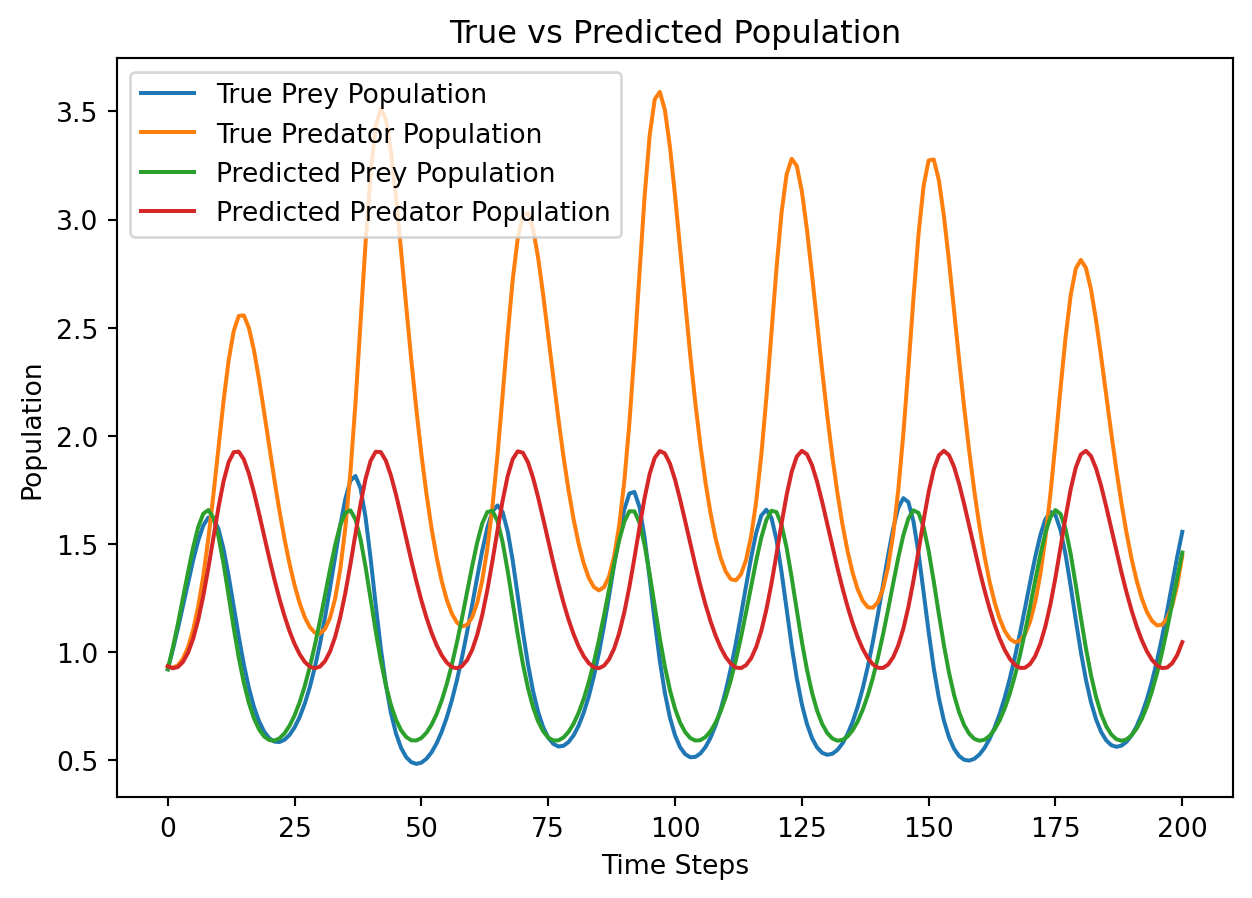

In [8]:
#| label: gauss-newton-test
#| fig-cap: Testing the Gauss-Newton optimization method.

period = 40.0  # Time horizon as a single float
n_time_steps = 200
initial_pop = torch.rand(2)

# Making a true data set to fit to
XX, M = generate_data_set(
    initial_pop=initial_pop, period=period, n_time_steps=n_time_steps, n_realizations=1
)
X = XX[0]
d_true = X[0, :]  # Use the prey population as the data to fit

# Start with an initial guess for the parameters
p0 = torch.tensor([1.7, 1.7, 0.7, 0.7], requires_grad=True)

# Solve the problem
p_opt, predictions = gauss_newton_solver(
    forward_model, p0, d_true, max_iter=45, tol=1e-4, mu=1e-1, verbose=False
)

# Make a final plot of the both pred prey true data and the predicted data
X_hat = lotka_volterra(p_opt, initial_pop, T=period, nt=n_time_steps)

plt.figure()
plt.plot(X[0, :].detach().numpy(), label="True Prey Population")
plt.plot(X[1, :].detach().numpy(), label="True Predator Population")
plt.plot(X_hat[0, :].detach().numpy(), label="Predicted Prey Population")
plt.plot(X_hat[1, :].detach().numpy(), label="Predicted Predator Population")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Population")
plt.title("True vs Predicted Population")
plt.show()

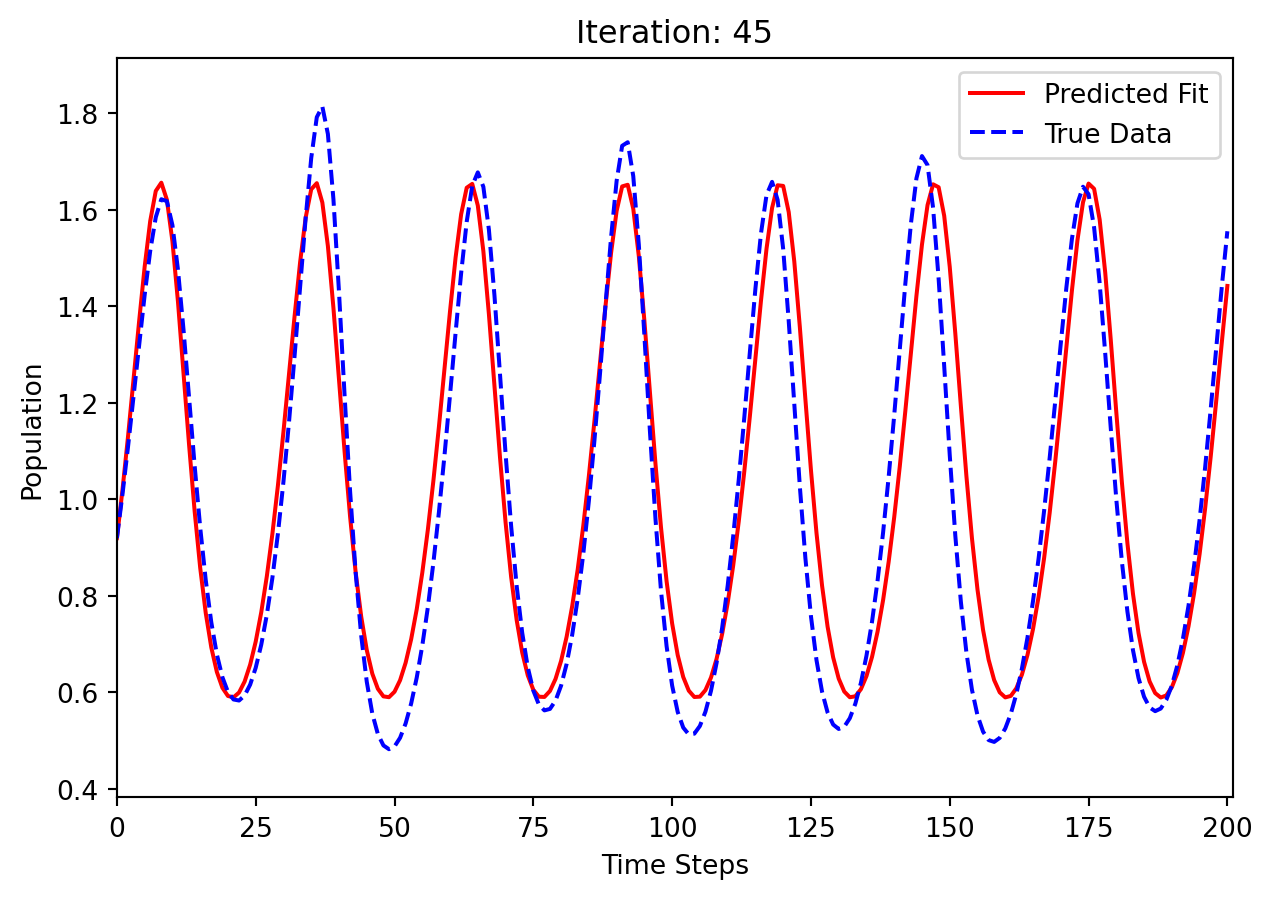

In [9]:
#| label: animation
#| fig-cap: Animation of the Gauss-Newton optimization method.
#| output: false

from matplotlib.animation import FuncAnimation


def create_animation(true_data, predictions, filename="imgs/fitting_animation.gif"):
    fig, ax = plt.subplots()
    (line1,) = ax.plot([], [], "r-", label="Predicted Fit")
    (line2,) = ax.plot([], [], "b--", label="True Data")
    ax.legend()

    # Set titles and labels
    ax.set_xlabel("Time Steps")
    ax.set_ylabel("Population")

    def init():
        # Set x and y limits based on true_data and predictions
        ax.set_xlim(0, len(true_data))
        ax.set_ylim(
            min(true_data.min(), predictions[0].min()) - 0.1,
            max(true_data.max(), predictions[0].max()) + 0.1,
        )
        line2.set_data(
            range(len(true_data)), true_data
        )  # Set true data once, as it remains constant
        ax.set_title("Iteration: 0")  # Initial title for iteration count
        return line1, line2

    def update(i):
        # Update predicted data and title with the current iteration count
        line1.set_data(range(len(predictions[i])), predictions[i])
        ax.set_title(f"Iteration: {i + 1}")
        return line1, line2

    # Create animation with updated frames
    ani = FuncAnimation(fig, update, frames=len(predictions), init_func=init, blit=True)
    ani.save(filename, writer="imagemagick")


# Create the animation
create_animation(
    d_true.cpu().detach().numpy(),
    [pred.cpu().numpy() for pred in predictions],
    "imgs/fitting_animation.gif",
)

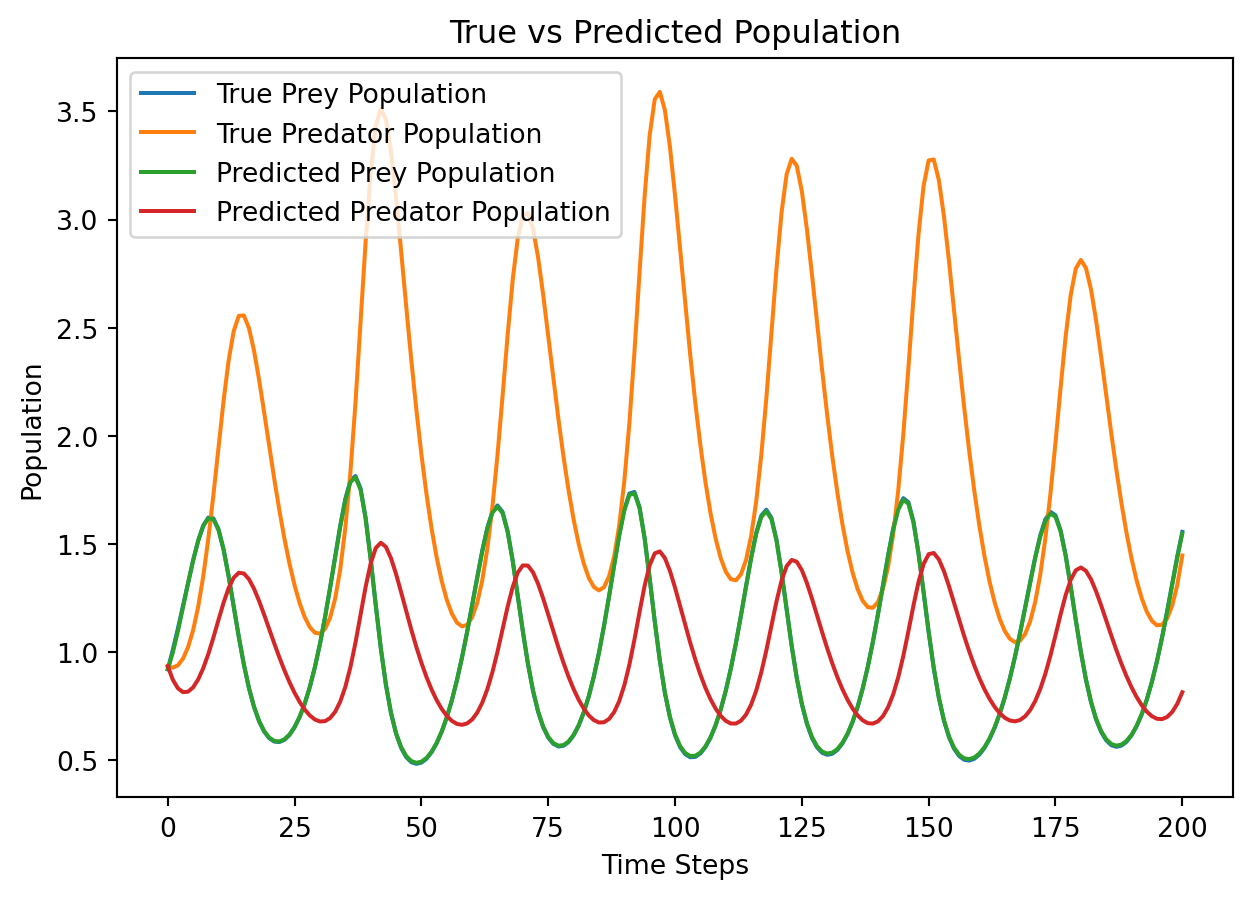

In [10]:
#| label: time-varying-parameters
#| fig-cap: Fitting the Lotka-Volterra model with time-varying parameters.
#| code-fold: false

# Start with an initial guess for the parameters
p0 = torch.tensor([1.7, 1.7, 0.7, 0.7], requires_grad=True)
# Extend p0 to repeat over the time steps with individual gradients
p0 = p0.unsqueeze(0).expand(n_time_steps, -1)

# Solve the problem
p_opt, predictions = gauss_newton_solver(
    forward_model, p0, d_true, max_iter=45, tol=1e-4, mu=1e-1, verbose=False
)

# Make a final plot of the both pred prey true data and the predicted data
X_hat = lotka_volterra(p_opt, initial_pop, T=period, nt=n_time_steps)

plt.figure()
plt.plot(X[0, :].detach().numpy(), label="True Prey Population")
plt.plot(X[1, :].detach().numpy(), label="True Predator Population")
plt.plot(X_hat[0, :].detach().numpy(), label="Predicted Prey Population")
plt.plot(X_hat[1, :].detach().numpy(), label="Predicted Predator Population")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Population")
plt.title("True vs Predicted Population")
plt.show()

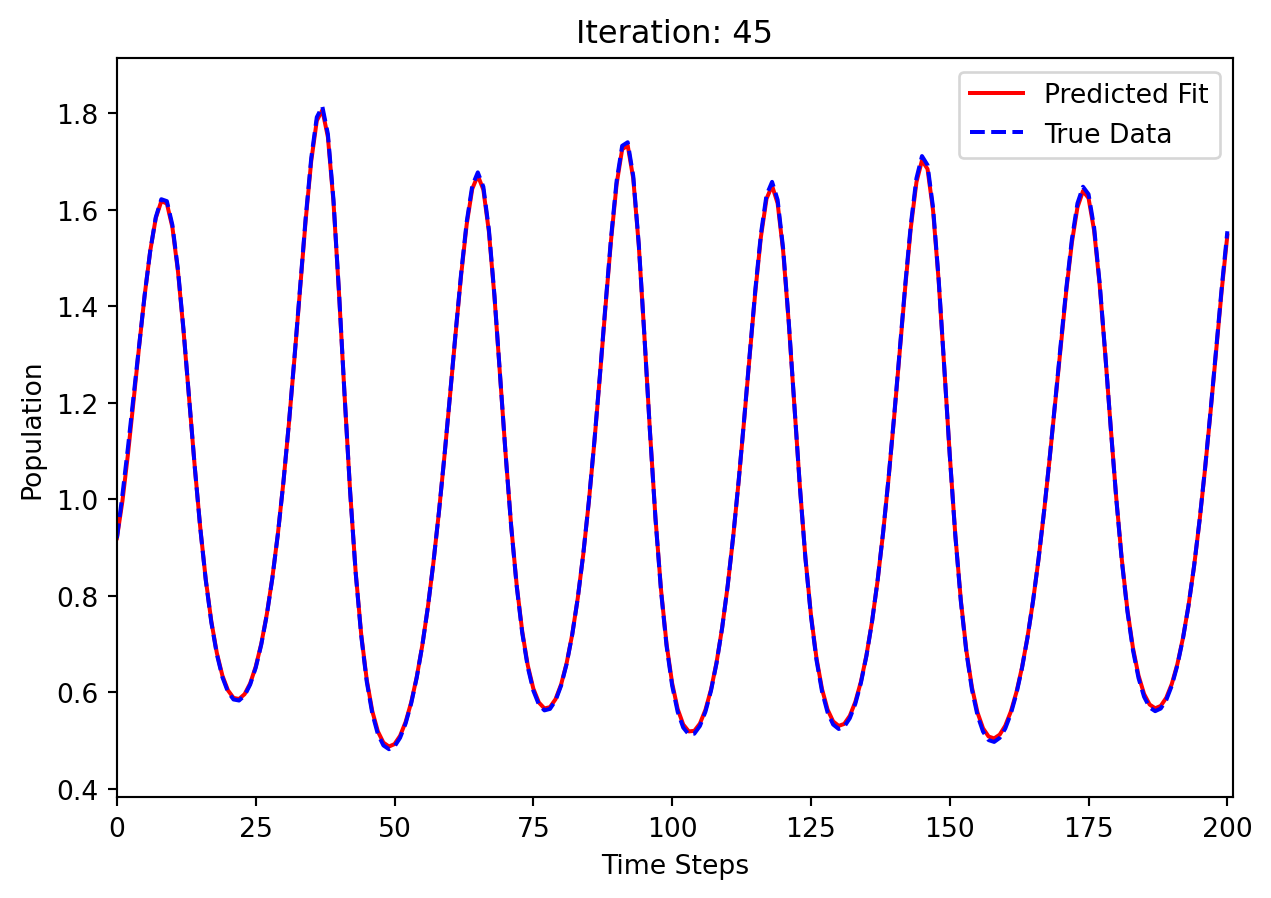

In [11]:
# | echo: false
# | output: false
# Make an animation of the optimization process
create_animation(
    d_true.cpu().detach().numpy(),
    [pred.cpu().numpy() for pred in predictions],
    "imgs/fitting_animation_time_varying.gif",
)